# Star Ways Survey
Star Wars is an immensely popular worldwide saga. Today, I will analyze survey data from FiveThirtyEight. In this survey, people were asked if they had seen the first 6 Star Wars films, if they liked them, how they would rank them, and so on. The dataset is available <a href='https://github.com/fivethirtyeight/data/tree/master/star-wars-survey'>here</a>.

I will answer a few questions:
<ul><li>Which Star Wars film is the favorite among those surveyed?</li>
    <li>Which Star Wars films have been seen more than others?</li>
    <li>Does a different favorite Star Wars film exist among men surveyed as opposed to women surveyed?</li></ul>

In [1]:
import pandas as pd
import numpy as np

file = '/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 8 | Star Wars Survey/StarWars.csv'

star_wars = pd.read_csv(file, encoding='ISO-8859-1')
star_wars.shape

(1187, 38)

In [2]:
pd.set_option('display.max_columns', 50)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

## Data Cleaning
I will perform some data cleaning before analyzing the data. I will remove the title column from the dataset, I will change some yes/no columns to boolean True/False columns, and I will change the names of columns relevant to my analysis.

In [4]:
title_column = star_wars.iloc[[0]]
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [6]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [10]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map({'Star Wars: Episode I  The Phantom Menace': True,
                                         'Star Wars: Episode II  Attack of the Clones': True,
                                         'Star Wars: Episode III  Revenge of the Sith': True,
                                         'Star Wars: Episode IV  A New Hope': True,
                                         'Star Wars: Episode V The Empire Strikes Back': True,
                                         'Star Wars: Episode VI Return of the Jedi': True,
                                         np.nan: False})

In [9]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'have seen Episode 1',
                                      'Unnamed: 4': 'have seen Episode 2',
                                      'Unnamed: 5': 'have seen Episode 3',
                                      'Unnamed: 6': 'have seen Episode 4',
                                      'Unnamed: 7': 'have seen Episode 5',
                                      'Unnamed: 8': 'have seen Episode 6'})

In [12]:
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking Episode 1',
                                      'Unnamed: 10': 'ranking Episode 2',
                                      'Unnamed: 11': 'ranking Episode 3',
                                      'Unnamed: 12': 'ranking Episode 4',
                                      'Unnamed: 13': 'ranking Episode 5',
                                      'Unnamed: 14': 'ranking Episode 6'})

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].mean()

ranking Episode 1    3.732934
ranking Episode 2    4.087321
ranking Episode 3    4.341317
ranking Episode 4    3.272727
ranking Episode 5    2.513158
ranking Episode 6    3.047847
dtype: float64

## Data Analysis
I will now create several bar charts to visualize viewers' opinions of the 6 Star Wars movies. For charts in which a lower score is more valuable (for example, average ranking, since 1 is a better score than 6), I will simple calculate the reciprocal of the average (1/Average). This way, scores like this that have a lower average (and are therefore scored better) will display a larger, more robust bar on the chart.

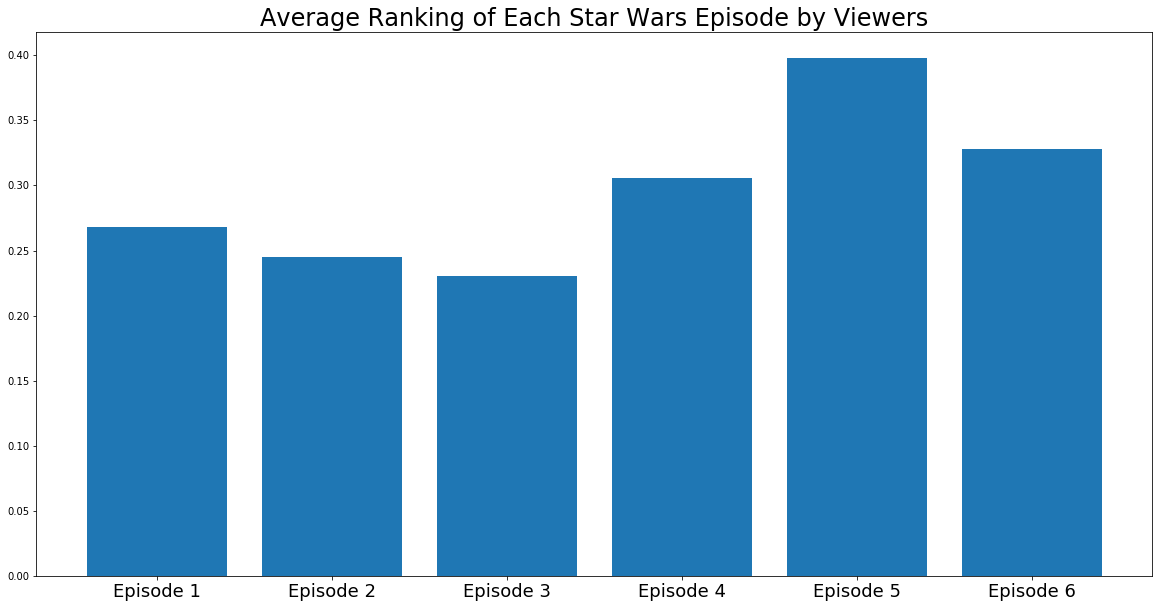

In [80]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

episodes = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']
plt.figure(figsize=(20,10))
plt.bar(range(1,7), 1/star_wars[star_wars.columns[9:15]].mean(), tick_label=episodes)
plt.title('Average Ranking of Each Star Wars Episode by Viewers')
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=10)

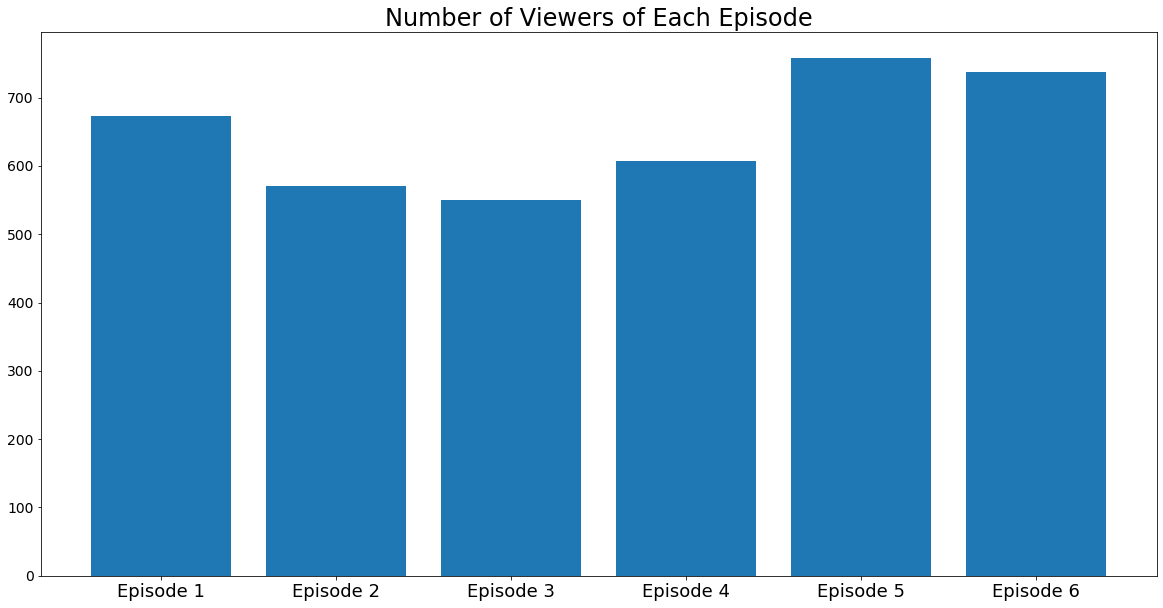

In [73]:
num_viewers=[]

for col in star_wars.columns[3:9]:
    viewers = star_wars[col].sum()
    num_viewers.append(viewers)

matplotlib.rc('font', **font)

plt.figure(figsize=(20,10))
plt.bar(range(1,7), num_viewers, tick_label=episodes)
plt.title('Number of Viewers of Each Episode')
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=12)

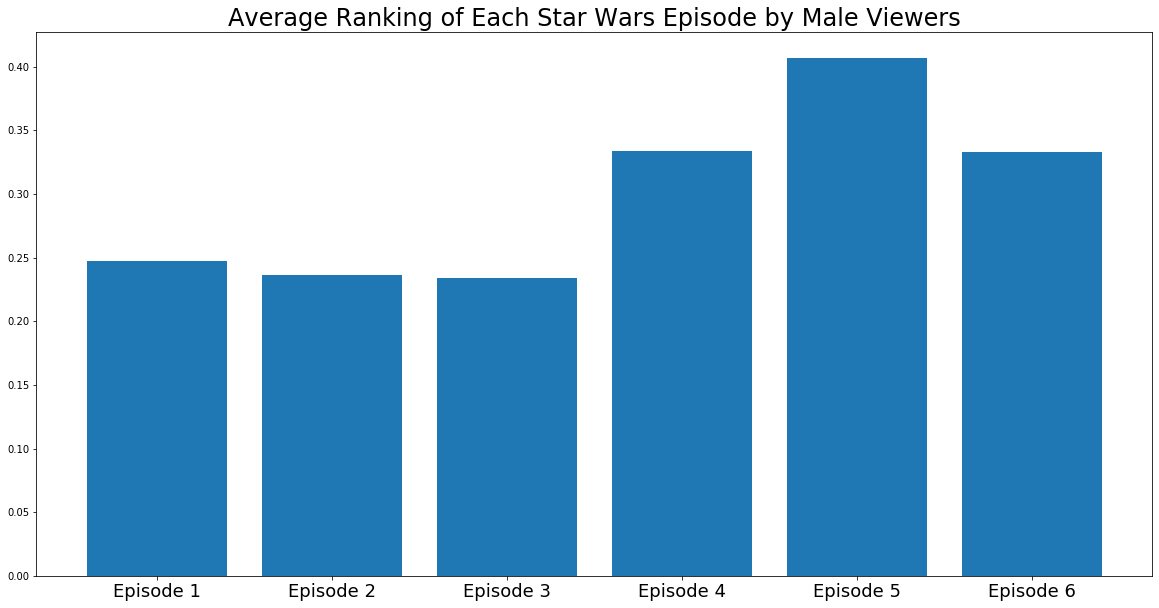

In [81]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

matplotlib.rc('font', **font)

plt.figure(figsize=(20,10))
plt.bar(range(1,7), 1/males[males.columns[9:15]].mean(), tick_label=episodes)
plt.title('Average Ranking of Each Star Wars Episode by Male Viewers')
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=12)

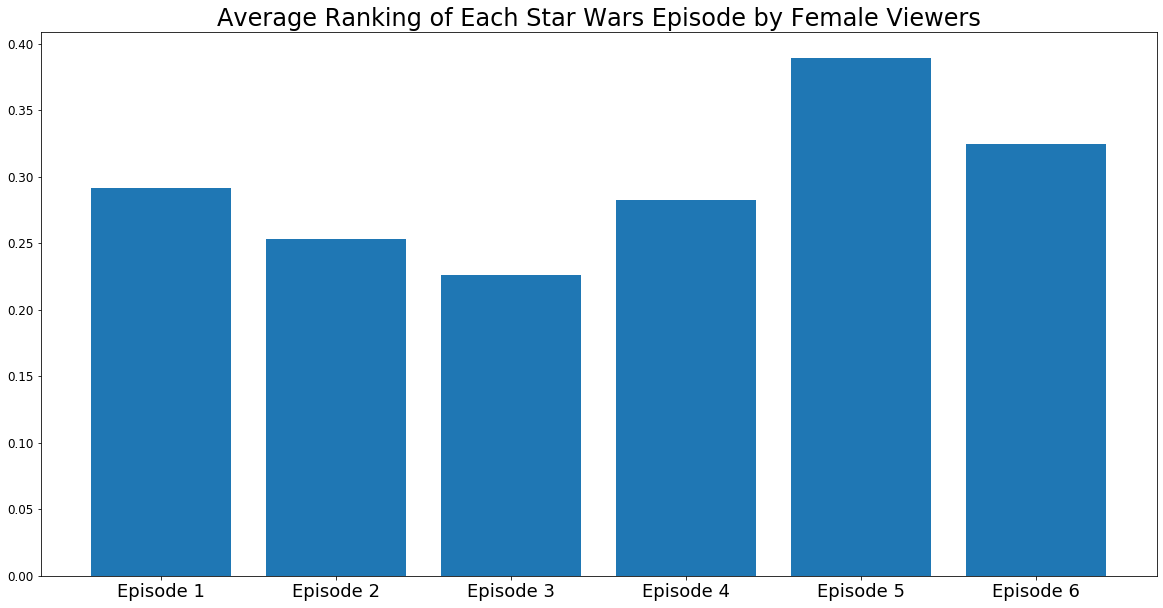

In [83]:
matplotlib.rc('font', **font)

plt.figure(figsize=(20,10))
plt.bar(range(1,7), 1/females[females.columns[9:15]].mean(), tick_label=episodes)
plt.title('Average Ranking of Each Star Wars Episode by Female Viewers')
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=12)

## Conclusion
The clear favorite Star Wars episode is Star Wars Episode 5: The Empire Strikes Back. This is good news for Star Wars fans everywhere who conclude that it is indeed the best episode. Interestingly, Episode 5 also have the greatest number of views by a small margin. All episodes have been seen by at least approximately 50% of the number of people surveyed. 